# Heap



We cant think of a heap as an array with a special property: 

    the smallest value is the array is always in the first index of the array.

If we remove the smallest value from the heap, the elements of the array efficiently re-arrange so that the next smallest value takes its place at the front ot the array.

Heaps are most frequently used in coding interviews to solve a class of problem known as "Top K" problems, which involce finding the k smallest or largest elements in a collection of elements.

## Heap Properties

Although we can think of a heap as an array, it's more helpful to visualize a heap as a binary tree. 

The elements correspond to a **level-order traversal of the binary tree**. 
The root of the binary tree is stored at index 0, its left and right children are stored at index 1 and 2, respectively, and so on.

![alt text](../Images/heap/binary-tree-heap.png)

Our heap is a **min-heap** because the smallest value in the heap is at the root node (compare that to a max-heap, in which the largest value is at the root node).

The binary tree satisfies the heap property: each node in the ree has a value that is less than or equal to the values of both its children.

![alt text](../Images/heap/heap-2.png)

Any binary tree that satisfies the heap property is a heap:

![heap-3.png](../Images/heap/heap-3.png)

Heaps are **complete binary trees**, which means that all levels of the tree are fully filled exept for the last level, which is filled from left to right.

![heap-4.png](../Images/heap/heap-4.png)

Since heaps are complete binary trees, the height of a heap is `o(log n)`, where `n` is the number of elements in the heap. This is a important property to keep in mind when analyzing the time complexity of heaps operations.


### Max Heap



The heap property for a **max heap** is that each node has a value that is greater than or equal to the values of both its children.

![heap-5.png](../Images/heap/heap-5.png)

## Parent-Child Relationship

We can express the parent-child relationships of the binary tree representation of a heap using the indexes of the array. Give a node at index `i` in the array:

| Node         | Index                             |
|--------------|------------------------------------|
| Left Child   | `2 * i + 1`                        |
| Right Child  | `2 * i + 2`                        |
| Parent       | `⌊(i - 1) / 2⌋` (floor division)    |


For example, for the node are index `i=2`:
- The left child is ar index `2 * 2 + 1 = 5`
- The right child is index `2 * 2 + 2 = 6`
- The parent is `⌊(i - 1) / 2⌋ = 0`

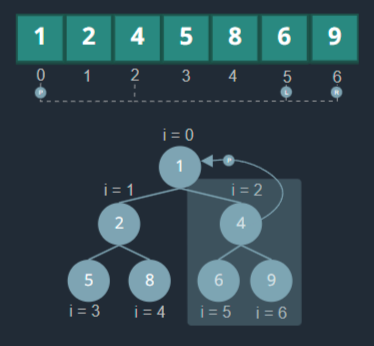

## Heap Operations

A heap supports the following operations:
- **push(element)**: Add a new element to the heap.
- **pop()**: Remove the root element from the heap.
- **peek()**: Get the root element without removing it.
- **heapify([elements])**: Convert an array into a heap in-place.

Although Python provides a built-in heapq module, we will focus on explaining and understanding the underlying concepts of heaps.

### Push

The push operation takes a new element and adds it to the heap. The element is added in a way such that the heap property is maintained.

We'll visualize each step of how the heap on the left changes after we add a new avalie of 3:

**Step 1:** Add the new element to the next avaliable postion in the last level of the tree.

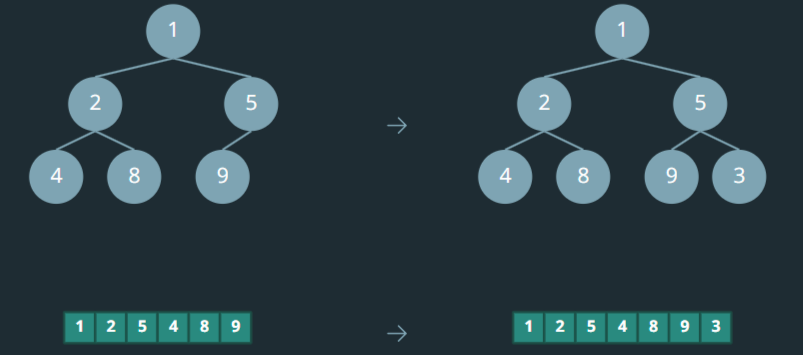

**Step 2:** *Bublle up*
Compare the new element with its parent. If the **new element is less that its parent**, swap the two elements.
Repeat this process until the new element is greater that its parent, or until it reaches the root of the heap.

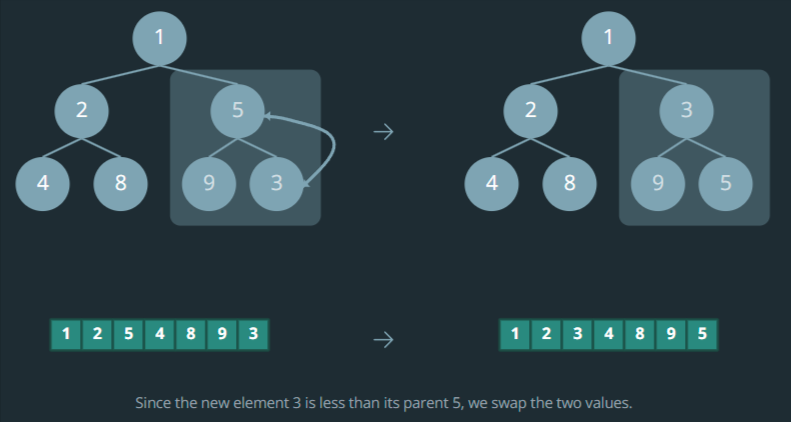


#### Time complexity

The time complexity of the push operation is 0(log n) where `n` is the number of items in the heap.

In the worst case, the new element will start at the last level of the tree and will "bubble up" to the root, which takes O(log n) swaps, or the height of the tree. Since we are swapping indexes in the array, each swap operations takes O(1) time.

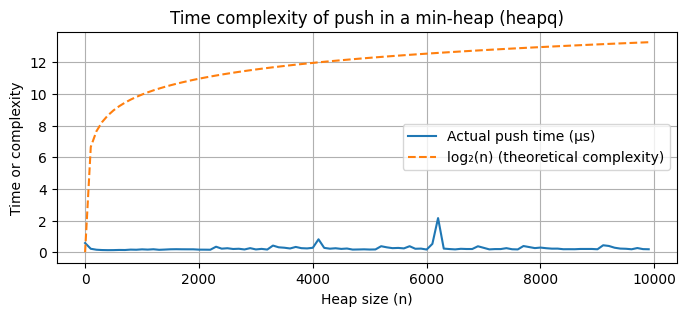

In [5]:
import heapq
import time
import matplotlib.pyplot as plt
import numpy as np

heap = []
sizes = []
times = []

for n in range(1, 10_000, 100):
    heap = list(range(n))  # pre-fill the heap with n elements
    heapq.heapify(heap)

    start = time.perf_counter()
    heapq.heappush(heap, -1)  # worst case: smallest value bubbles to the root
    end = time.perf_counter()

    sizes.append(n)
    times.append((end - start) * 1e6)  # convert time to microseconds

# Theoretical complexity: O(log n)
log_n = [np.log2(n) for n in sizes]

plt.figure(figsize=(8, 3))
plt.plot(sizes, times, label="Actual push time (μs)")
plt.plot(sizes, log_n, label="log₂(n) (theoretical complexity)", linestyle='--')
plt.xlabel("Heap size (n)")
plt.ylabel("Time or complexity")
plt.title("Time complexity of push in a min-heap (heapq)")
plt.legend()
plt.grid(True)
plt.show()


**Graph Explanation**

The graph shows the time complexity of the heappush operation in Python's heapq module.

- The blue line represents the actual measured time (in microseconds) to insert an element into a heap of size n.

- The dashed line shows the theoretical complexity, which is O(log n).

As the heap size increases, the time it takes to perform a push operation grows logarithmically, confirming the expected complexity. This illustrates how efficient the heap structure is, even as the data grows large.

### Pop

The pop operation removes and returns the minimum value in the heap. When the **pop** operation is complete, the new root of the heap is the new minimun value in the heap, and the heap property is restored.

We'll visualize each step of how the heap on the left changes after we remove the root element.

**Step 1:**
Remove the root element from the heap, and replace it with the last element in the heap (the rightmost node in the last level)

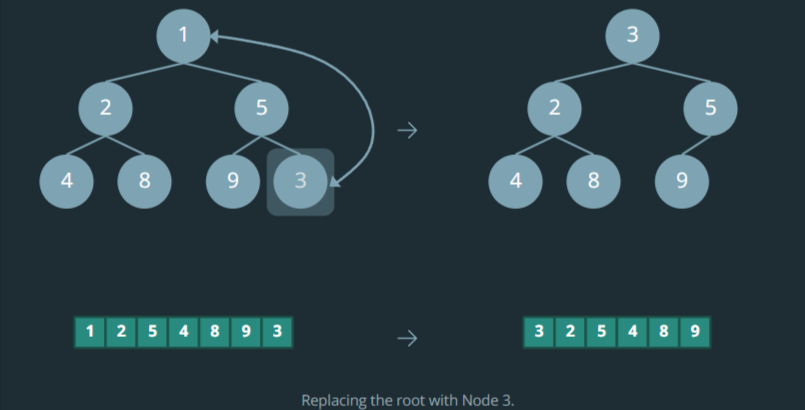


**Step 2:** *Bubble down*
Compare the new root with its children. If the new toor is greater than either of its children, swap the root with the smaller of the two children. Repeat this process until the new root is less than both of its children, or until it reaches the last level of the heap.

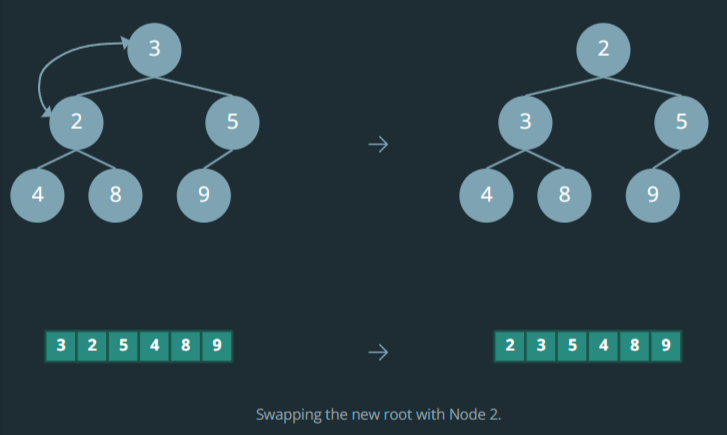


#### Time complexity

The time complexity of the pupopsh operation is 0(log n), where n is the number of the items in the heap.

In the worst case, after removin the root element, the new root starts at the top af the tree and "bubble down" to the last level of the tree, which takes 0(log n) swaps, or the height of the tree.

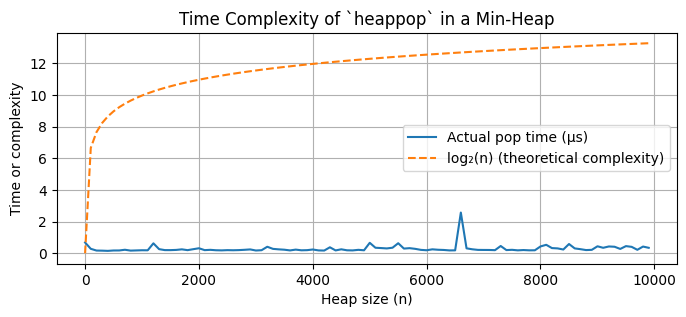

In [8]:
sizes = []
times = []

for n in range(1, 10_000, 100):
    heap = list(range(n))  # build a heap with n elements
    heapq.heapify(heap)

    start = time.perf_counter()
    heapq.heappop(heap)  # pop the root element (worst case path down)
    end = time.perf_counter()

    sizes.append(n)
    times.append((end - start) * 1e6)  # time in microseconds

# Theoretical complexity: O(log n)
log_n = [np.log2(n) for n in sizes]

# Plotting
plt.figure(figsize=(8, 3))
plt.plot(sizes, times, label="Actual pop time (μs)")
plt.plot(sizes, log_n, label="log₂(n) (theoretical complexity)", linestyle='--')
plt.xlabel("Heap size (n)")
plt.ylabel("Time or complexity")
plt.title("Time Complexity of `heappop` in a Min-Heap")
plt.legend()
plt.grid(True)
plt.show()

### Peek


The peek operation returns the minimun valie in the heap without removing it. The minimum value is always the root of the heap.

#### Time complexity

`0(1)`: The **peek** operation has a constant time complexity since it only involves accessing the root of the heap, which is always index 0.

### Heapify

The `heapify` operation takes a list of elements and converts it into a heap in 0(n) time.

We'll start with [4,6,9,3,2,8,3] and convert it into a heap using the `heapify` operation.

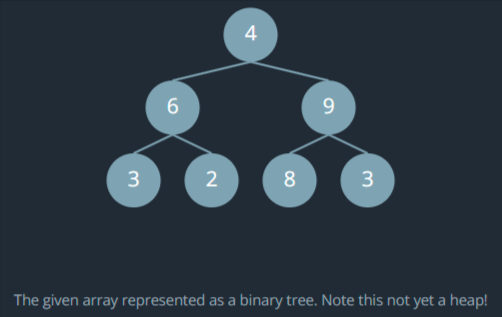

**Step 1:**
Starting with the first non-leaf node (the parent of the last element in the array), compare the node with its children. If the node is great than either of its children, swap the node with the smaller of the two children.

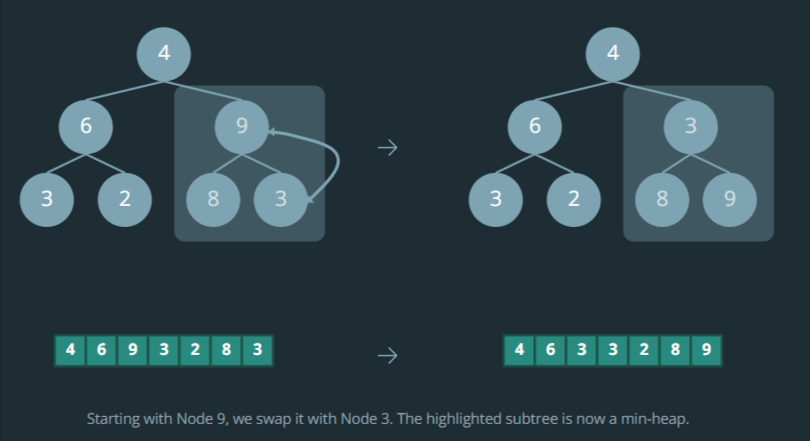


**Step 2:**
Move to the next non-leaf node and repeat the process until the root of the tree is reached.

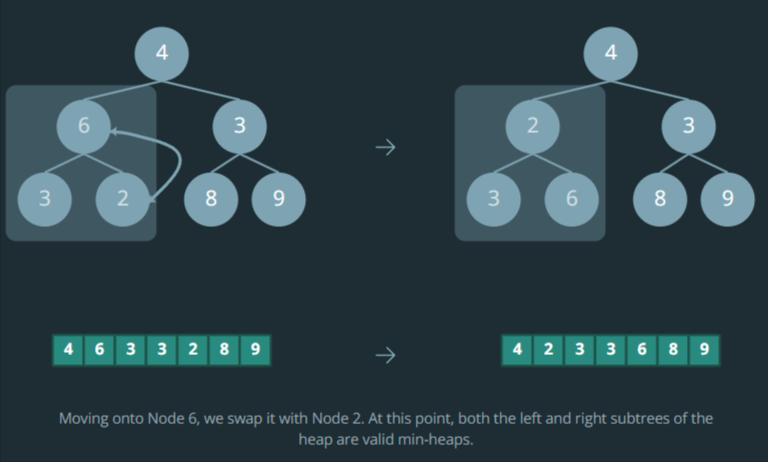

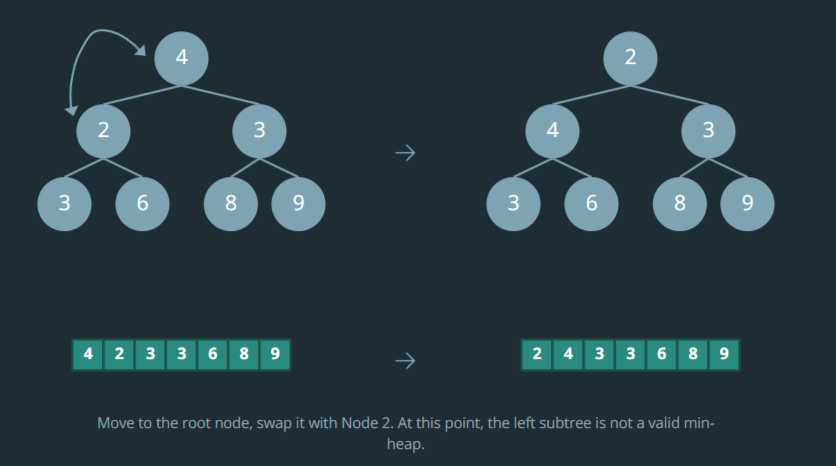

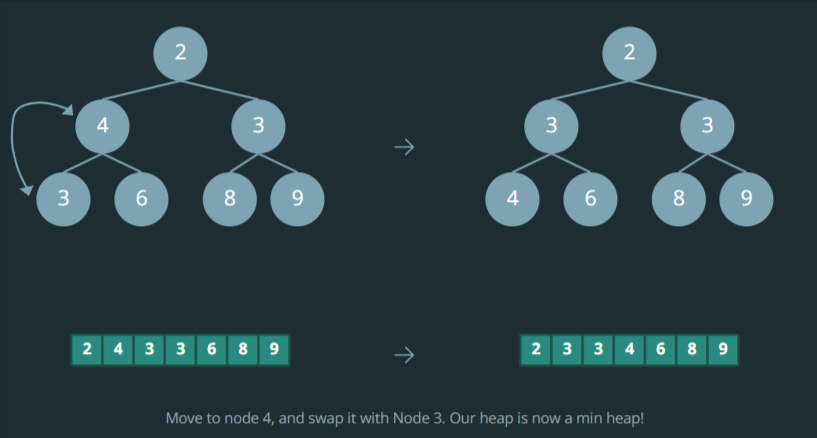


#### Time Complexity

`0(n)`. The formal proof for the time complexity of the heapify operation is very much heavy, and beyond the scope of coding interview.
- https://en.wikipedia.org/wiki/Binary_heap#Building_a_heap

## Summary

| Operation | Time Complexity | Notes                                                             |
|-----------|-----------------|-------------------------------------------------------------------|
| pop       | O(log n)        | Visualize bubbling down the new root to the last level of the tree. |
| push      | O(log n)        | Visualize bubbling up the new element to the root of the tree.     |
| peek      | O(1)            | Access the root of the heap.                                       |
| heapify   | O(n)            | Just memorize this!                                                |


## Python HeapQ Module

Python provides a built-in module called `heapq` that we can use to turn arrays into min-heaps.

The `heapify` function can be used to vonvert an array into a heap in-place. 

The `heappush` and `heappop` funtcions are used to push and pop elemente from the heap.

### Example

In [10]:
import heapq

print("Initial array (unordered):")
arr = [3, 1, 4, 1, 5, 9, 2]
print(arr)

print("\nStep 1: Convert array into a min-heap using heapify (O(n))")
heapq.heapify(arr)
print("Heapified array:", arr)

print("\nStep 2: Push 0 into the heap (O(log n))")
heapq.heappush(arr, 0)
print("Heap after push:", arr)

print("\nStep 3: Peek the smallest element (O(1))")
print("Min element (peek):", arr[0])

print("\nStep 4: Pop the smallest element (O(log n))")
min_element = heapq.heappop(arr)
print("Popped element:", min_element)
print("Heap after pop:", arr)

print("\nStep 5: Peek the new min element (O(1))")
print("New min element (peek):", arr[0])

Initial array (unordered):
[3, 1, 4, 1, 5, 9, 2]

Step 1: Convert array into a min-heap using heapify (O(n))
Heapified array: [1, 1, 2, 3, 5, 9, 4]

Step 2: Push 0 into the heap (O(log n))
Heap after push: [0, 1, 2, 1, 5, 9, 4, 3]

Step 3: Peek the smallest element (O(1))
Min element (peek): 0

Step 4: Pop the smallest element (O(log n))
Popped element: 0
Heap after pop: [1, 1, 2, 3, 5, 9, 4]

Step 5: Peek the new min element (O(1))
New min element (peek): 1


### Max Heap

By default, the `heapq` modeule creates a min-heap. To create a `max-heap`, we can negate the values in the list and convert it into a heap using heapify function. We also need to remenber to negate the values when we push and pop elements from the heap.

In [11]:
import heapq

print("Initial array (unordered):")
arr = [3, 1, 4, 1, 5, 9, 2]
print(arr)

print("\nStep 1: Negate all values to simulate a max-heap using a min-heap")
negated_arr = [-x for x in arr]
print("Negated array:", negated_arr)

print("\nStep 2: Convert negated array into a min-heap (heapify)")
heapq.heapify(negated_arr)
print("Heapified (negated) array:", negated_arr)

print("\nStep 3: Push 11 into the max-heap (as -11)")
heapq.heappush(negated_arr, -11)
print("Heap after pushing -11:", negated_arr)

print("\nStep 4: Peek the current max element (remember to negate back)")
print("Current max element (peek):", -negated_arr[0])

print("\nStep 5: Pop the max element (which is the min of negated values)")
max_element = -heapq.heappop(negated_arr)
print("Popped max element:", max_element)
print("Heap after pop:", negated_arr)

print("\nStep 6: Peek the new max element")
print("New max element (peek):", -negated_arr[0])

Initial array (unordered):
[3, 1, 4, 1, 5, 9, 2]

Step 1: Negate all values to simulate a max-heap using a min-heap
Negated array: [-3, -1, -4, -1, -5, -9, -2]

Step 2: Convert negated array into a min-heap (heapify)
Heapified (negated) array: [-9, -5, -4, -1, -1, -3, -2]

Step 3: Push 11 into the max-heap (as -11)
Heap after pushing -11: [-11, -9, -4, -5, -1, -3, -2, -1]

Step 4: Peek the current max element (remember to negate back)
Current max element (peek): 11

Step 5: Pop the max element (which is the min of negated values)
Popped max element: 11
Heap after pop: [-9, -5, -4, -1, -1, -3, -2]

Step 6: Peek the new max element
New max element (peek): 9


### Storing tuples

The `heapq` modiule can also be used to store tuples in the heap. By deafult, the heap is ordered based on the first element of the tuple. If the first element are equal, the second elemente is compared, an so on.

In [12]:
import heapq

print("Initial array of tuples (unordered):")
arr = [(3, 1), (1, 5), (4, 2), (1, 9), (5, 3), (9, 4), (2, 6)]
print(arr)

print("\nStep 1: Convert the array of tuples into a min-heap using heapify")
heapq.heapify(arr)
print("Heapified array:", arr)

print("\nStep 2: Pop and return the smallest element based on tuple ordering")
min_element = heapq.heappop(arr)
print("Popped min element:", min_element)
print("Heap after pop:", arr)

print("\nStep 3: Peek the current min element")
print("Current min element (peek):", arr[0])

print("\nStep 4: Push (1, 7) into the heap")
heapq.heappush(arr, (1, 7))
print("Heap after pushing (1, 7):", arr)

print("\nStep 5: Peek the new min element")
print("New min element (peek):", arr[0])


Initial array of tuples (unordered):
[(3, 1), (1, 5), (4, 2), (1, 9), (5, 3), (9, 4), (2, 6)]

Step 1: Convert the array of tuples into a min-heap using heapify
Heapified array: [(1, 5), (1, 9), (2, 6), (3, 1), (5, 3), (9, 4), (4, 2)]

Step 2: Pop and return the smallest element based on tuple ordering
Popped min element: (1, 5)
Heap after pop: [(1, 9), (3, 1), (2, 6), (4, 2), (5, 3), (9, 4)]

Step 3: Peek the current min element
Current min element (peek): (1, 9)

Step 4: Push (1, 7) into the heap
Heap after pushing (1, 7): [(1, 7), (3, 1), (1, 9), (4, 2), (5, 3), (9, 4), (2, 6)]

Step 5: Peek the new min element
New min element (peek): (1, 7)


## Use Case


**`Top-K largest element in An Array`**

Heaps are usefull for solving problems that require finding the "top k" elements in an array. 
For example, let's use a heap to find the 3 largest elements in an array.

### Description problem

Give an integer array `nums`, return the 3 largest element in the array in any order.

```python
Input: nums = [9, 3, 7, 1, -2, 6, 8]
Output: [8, 7, 9]
# or [7, 9, 8] or [9, 7, 8] ...
```

Here's how we ca solve this problem using a min-heap:
- Create a min-heap that stores the first 3 elements of the array. These represent the 3 largest elements we have seen so far, with the smallest of the 3 ar the root of the heap.
- Iterate through the remaining elements in the array:
    - If the current element is larger that the root of the heap, pop the root and push the current element into the heap.
    - Otherwise, continue to the next element.

    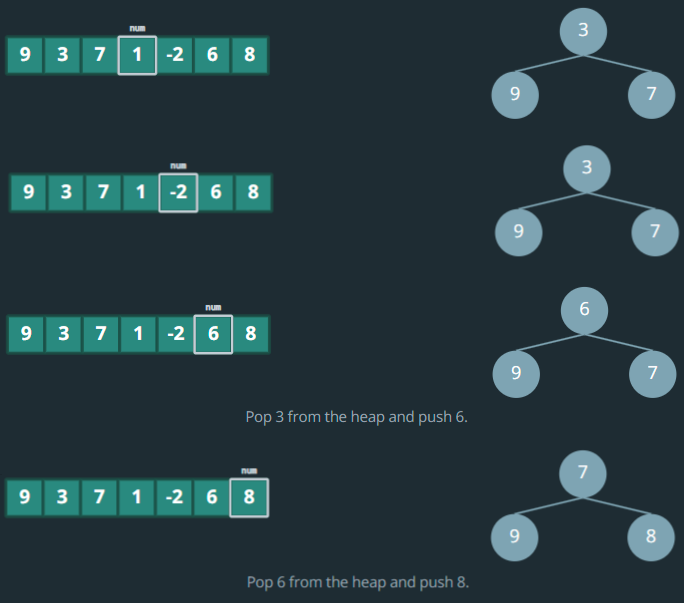

Afther iterating through all the elements, the heap contains the 3 largest elements in the array.

In [13]:
nums = [9, 3, 7, 1, -2, 6, 8]
k = 3  # number of largest elements to keep

print("Original array:")
print(nums)

# Step 1: Create a min-heap with the first k elements
heap = nums[:k]
heapq.heapify(heap)
print(f"\nStep 1: Initial heap with first {k} elements:")
print(heap)

# Step 2: Iterate through the remaining elements
print("\nStep 2: Process the rest of the array:")

for num in nums[k:]:
    print(f"\nChecking number: {num}")
    if num > heap[0]:
        removed = heapq.heappop(heap)
        heapq.heappush(heap, num)
        print(f"  {num} > {removed} (heap root) → Replace {removed} with {num}")
        print(f"  Updated heap: {heap}")
    else:
        print(f"  {num} <= {heap[0]} (heap root) → Skip")

# Step 3: Final result
print("\nStep 3: Final heap (contains the 3 largest elements):")
print(heap)


Original array:
[9, 3, 7, 1, -2, 6, 8]

Step 1: Initial heap with first 3 elements:
[3, 9, 7]

Step 2: Process the rest of the array:

Checking number: 1
  1 <= 3 (heap root) → Skip

Checking number: -2
  -2 <= 3 (heap root) → Skip

Checking number: 6
  6 > 3 (heap root) → Replace 3 with 6
  Updated heap: [6, 9, 7]

Checking number: 8
  8 > 6 (heap root) → Replace 6 with 8
  Updated heap: [7, 9, 8]

Step 3: Final heap (contains the 3 largest elements):
[7, 9, 8]


#### Complexity Analysis

**Time Complexity**

- The `heapify` function takes o(3) = 0(1) time.
- We iterate through all the elements in the array once, which takes O(n) time.
- The `heappop` and `heappush` operations take O(log 3) = 0(1)time.

Therefore, O(n) * O(log k) → with k = 3, this becomes O(n).

**Space Complexity**

- The heap stores at most 3 elements, so it takes O(3) = O(1) space
- Then, the space complexity is O(1).

**`Note:`** 

    If `3` becomes a variable `k`, time becomes O(n log k) and space becomes O(k).
